In [58]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import nltk

pal = sns.color_palette()

ImportError: No module named 'nltk'

In [8]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [35]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780



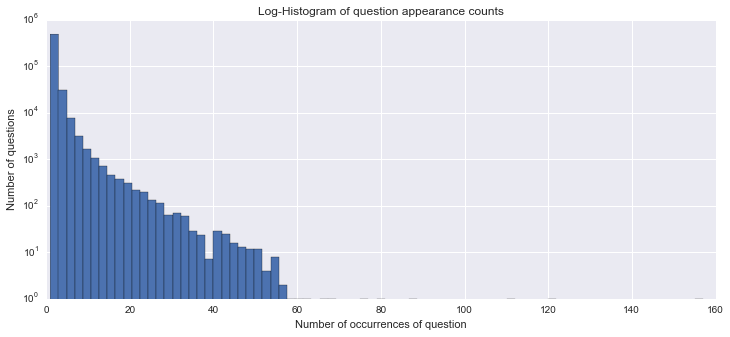

In [39]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts().values, bins=80)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number of questions')
print()

There are quite a number of duplicate questions. 

# Analysis
In the increasing level of specificity, we do
* Text Analysis: number of words and characters per question, most common words
* Semantic Analysis: presence of punctuation and other similar stuff (e.g. full stops, commas, numbers, capitalization, and in this case, [math] tags.
* Initial Feature Analysis: compare common words after removal of common words, using term frequency–inverse document frequency (TF-IDF)
* Advanced Feature Analysis: Latent semantic analysis, Word2Vec, "magic features"

We pool questions together in a Series for training and test data respectively.

In [41]:
train_qns = pd.Series(df_train["question1"].tolist() + df_train["question2"].tolist()).astype(str)
test_qns = pd.Series(df_test["question1"].tolist() + df_test["question2"].tolist()).astype(str)

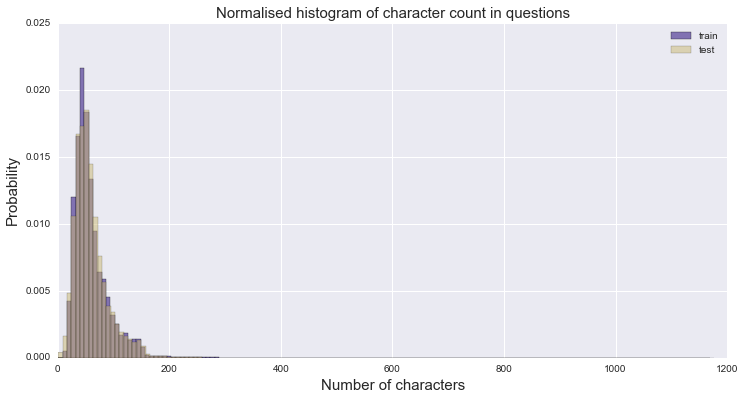

In [51]:
train_length = train_qns.apply(len)
test_length = test_qns.apply(len)

plt.figure(figsize=(12, 6))
plt.hist(train_length, bins=150, color=pal[3], normed=True, label="train")
plt.hist(test_length, bins=150, color=pal[4], normed=True, alpha=0.5, label="test")
plt.legend()
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
print()

There seems to be some questions over 200 characters long. A quick search on Google tells us that the maximum character count for Quora questions is 150, so we should examine that range instead.

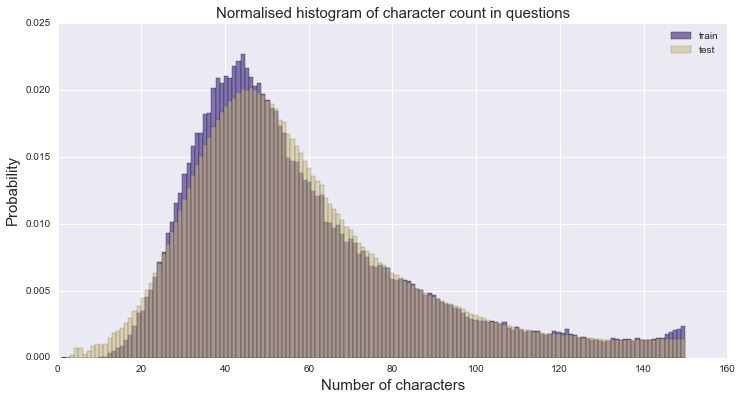

In [57]:
plt.figure(figsize=(12, 6))
plt.hist(train_length[train_length <= 150], bins=150, color=pal[3], normed=True, label="train")
plt.hist(test_length[test_length <= 150], bins=150, color=pal[4], normed=True, alpha=0.5, label="test")
plt.legend()
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
print()

In [55]:
train_length[train_length <= 150].describe()
test_length[train_length <= 150].describe()


count    799026.000000
mean         58.177099
std          27.587058
min           1.000000
25%          39.000000
50%          51.000000
75%          71.000000
max         150.000000
dtype: float64

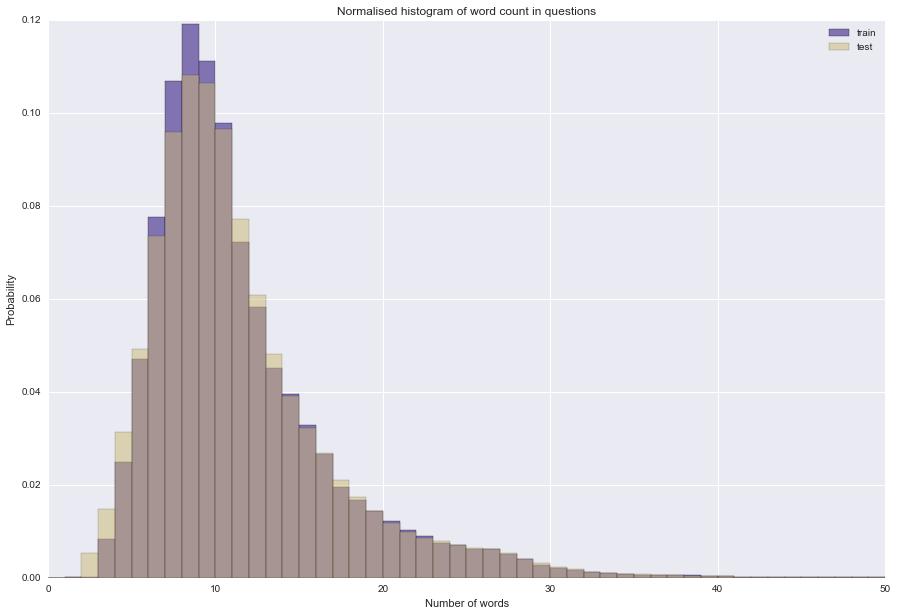

In [67]:
train_wlen = train_qns.apply(lambda s: len(s.split(" ")))
test_wlen = test_qns.apply(lambda s: len(s.split(" ")))

plt.figure(figsize=(15, 10))
plt.hist(train_wlen, bins=50, color=pal[3], range=[0, 50], normed=True, label="train")
plt.hist(test_wlen, bins=50, color=pal[4], range=[0, 50], alpha=0.5, normed=True, label="test")
plt.legend()
plt.title("Normalised histogram of word count in questions")
plt.xlabel("Number of words")
plt.ylabel("Probability")

['I', 'am', 'a', 'man,', 'she']